$\textbf{Assignment 4 Ian Dave Canlas - 23200047}$

Read about (Susanna Epp pp. 704):
1. Kruskal's Algorithm
2. Prim's Algorithm
3. Djitraka's Shortest Path Algorithm

Given the following graph, implement the algorithm in Python.

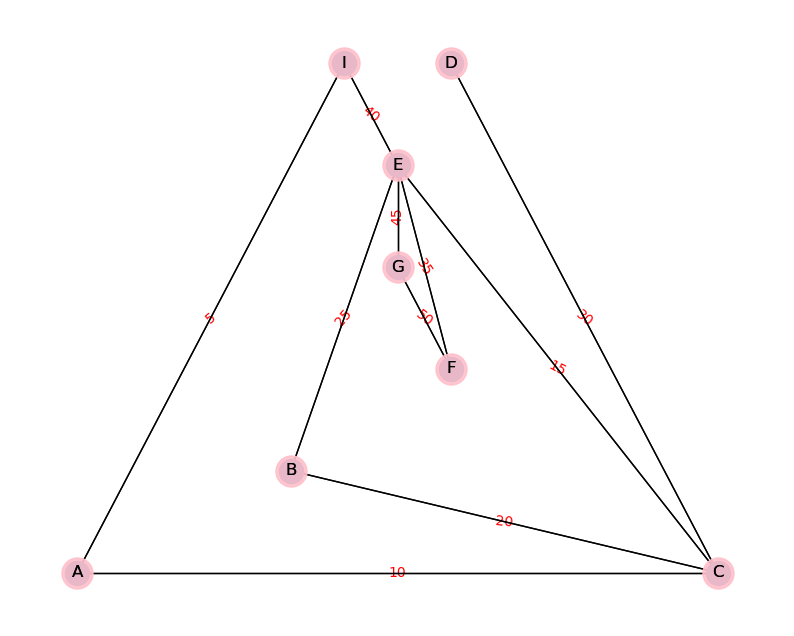

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
seed = 55
# Use seed for reproducibility
G = nx.Graph()
plt.figure(figsize=(10, 8))
# Add nodes
G.add_nodes_from(["A","B","C","D","E","F","G"])
# Add self-loops to the remaining nodes
edgelist = [("A","C"),("A","I"),("C","B"),("C","E"),("C","D"),("B","E"),("I","E"),("E","F"),("F","G"),("G","E")]
G.add_edges_from(edgelist)
pos = nx.planar_layout(G)  # Seed for reproducible layout

nx.draw_networkx_edge_labels(
    G, pos,
    edge_labels={("A","C"):10,("A","I"):5,("C","B"):20,("C","E"):15,("C","D"):30,("B","E"):25,("I","E"):40,("E","F"):35,("F","G"):50,("G","E"):45},
    font_color='red'
)
nx.draw(G, pos=pos,with_labels=True)
nx.draw(
    G, pos, edge_color='black', width=1, linewidths=1,
    node_size=500, node_color='pink', alpha=0.9,
    with_labels=True)

plt.show()

$\textbf{Kruskal's Algorithm and Prim's Algorithm}$

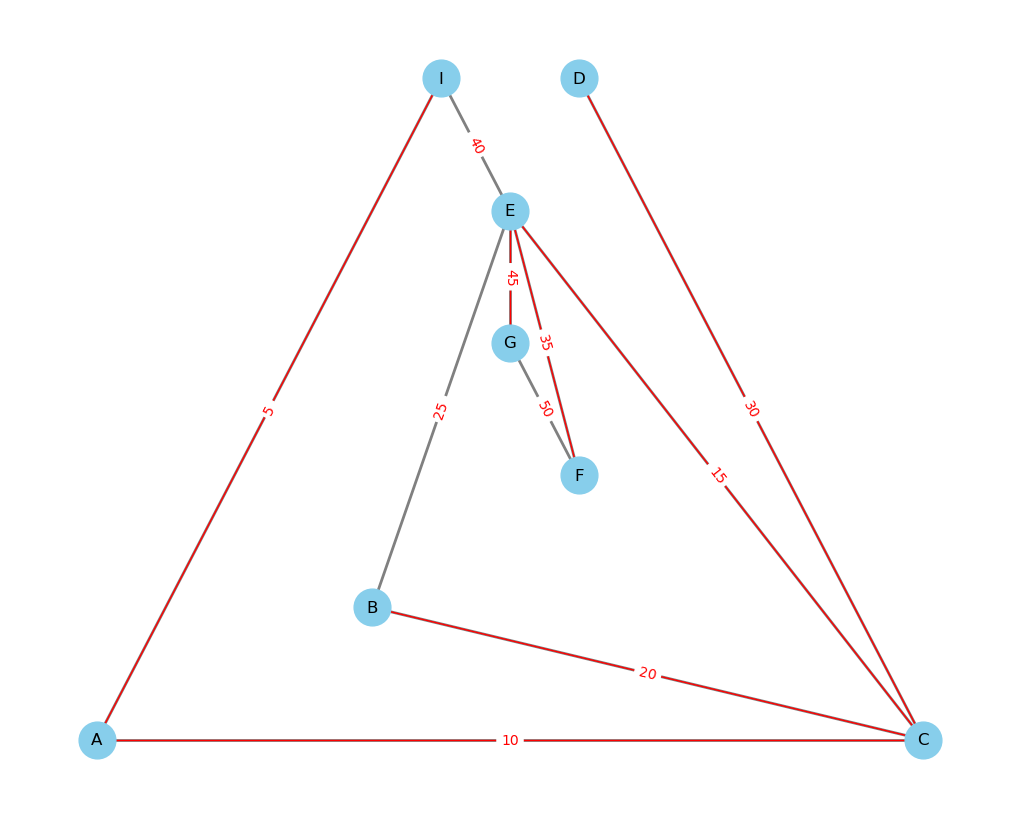

In [5]:
import networkx as nx
import matplotlib.pyplot as plt

def kruskal_algorithm(G):
    # Initialize the minimum spanning tree
    MST = nx.Graph()
    
    # Sort edges by weight
    sorted_edges = sorted(G.edges(data=True), key=lambda x: x[2]['weight'])
    
    # Create a disjoint set data structure
    disjoint_set = {node: {node} for node in G.nodes()}
    
    # Iterate through the sorted edges
    for u, v, data in sorted_edges:
        if find(disjoint_set, u) != find(disjoint_set, v):
            # Add the edge to the minimum spanning tree
            MST.add_edge(u, v, **data)
            
            # Merge the sets containing u and v
            union(disjoint_set, u, v)
            
    return MST

def find(disjoint_set, node):
    return next(iter([k for k, v in disjoint_set.items() if node in v]))

def union(disjoint_set, u, v):
    root_u = find(disjoint_set, u)
    root_v = find(disjoint_set, v)
    if root_u != root_v:
        disjoint_set[root_u].update(disjoint_set[root_v])
        del disjoint_set[root_v]

# Define the graph
G = nx.Graph()
plt.figure(figsize=(10, 8))
G.add_nodes_from(["A","B","C","D","E","F","G","I"])
edgelist = [("A", "C", 10), ("A", "I", 5), ("C", "B", 20), ("C", "E", 15), ("C", "D", 30), ("B", "E", 25), ("I", "E", 40), ("E", "F", 35), ("F", "G", 50), ("G", "E", 45)]
G.add_weighted_edges_from(edgelist)

# Run Kruskal's algorithm
MST = kruskal_algorithm(G)

# Draw the original graph
pos = nx.planar_layout(G)
nx.draw(G, pos, with_labels=True, node_size=700, node_color='skyblue', font_size=12, edge_color='gray', width=2)

# Draw the minimum spanning tree
nx.draw_networkx_edges(MST, pos=pos, edge_color='r', width=1)

# Display edge labels
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels, font_color='red')
plt.show()

$\textbf{Kruskal's Algorithm}$

\begin{array}{|c|c|c|c|c|}
\hline
Iteration Number & Edge Considered & Weight & Action Taken \\
1                & (A, I)          & 5     & Added        \\
2                & (A, C)          & 10      & Added        \\
3                & (C, E)          & 15     & Added       \\
4                & (B, C)          & 20     & Added       \\
5                & (B, E)          & 25     & Ignored   \\
6                & (C, D)          & 30     & Added       \\
7                & (E, F)          & 35     & Added   \\
8                & (E, I)          & 40     & Ignored      \\
9                & (E, G)          & 45     & Added       \\
10               & (F, G)          & 50     & Ignored   \\
\hline
\end{array}

$\textbf{Prim's Algorithm}$

\begin{array}{|c|c|c|c|}
\hline
Iteration & Vertex Added & Edge Added & Weight \\
\hline
0 & I & & \\
1 & A & (I, A) & 5 \\
2 & C & (A, C) & 10 \\
3 & E & (C, E) & 15 \\
4 & B & (C, B) & 20 \\
5 & D & (C, D) & 30 \\
6 & F & (E, F) & 35 \\
7 & G & (E, G) & 45 \\
\hline
\end{array}

$\textbf{3. Djitraka's Shortest Path Algorithm}$

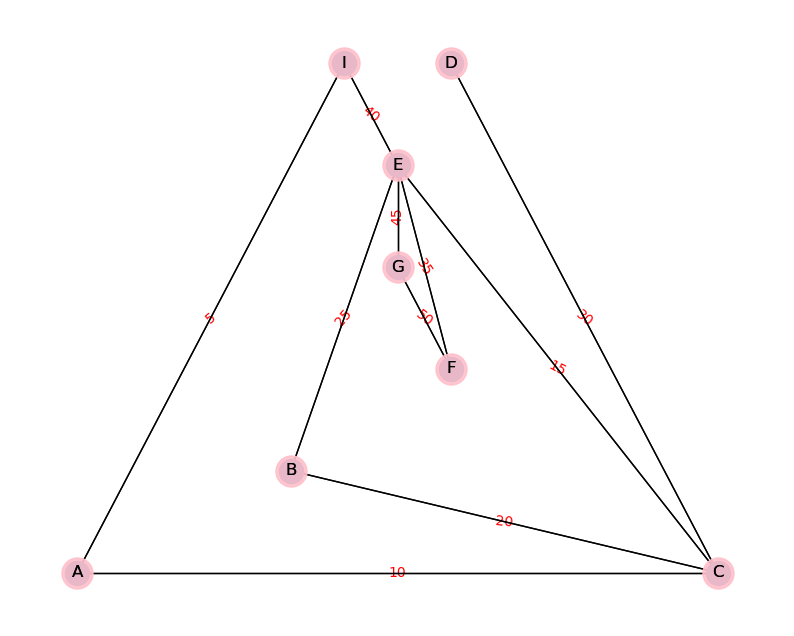

In [6]:
import matplotlib.pyplot as plt
import networkx as nx
seed = 55
# Use seed for reproducibility
G = nx.Graph()
plt.figure(figsize=(10, 8))
# Add nodes
G.add_nodes_from(["A","B","C","D","E","F","G"])
# Add self-loops to the remaining nodes
edgelist = [("A","C"),("A","I"),("C","B"),("C","E"),("C","D"),("B","E"),("I","E"),("E","F"),("F","G"),("G","E")]
G.add_edges_from(edgelist)
pos = nx.planar_layout(G)  # Seed for reproducible layout

nx.draw_networkx_edge_labels(
    G, pos,
    edge_labels={("A","C"):10,("A","I"):5,("C","B"):20,("C","E"):15,("C","D"):30,("B","E"):25,("I","E"):40,("E","F"):35,("F","G"):50,("G","E"):45},
    font_color='red'
)
nx.draw(G, pos=pos,with_labels=True)
nx.draw(
    G, pos, edge_color='black', width=1, linewidths=1,
    node_size=500, node_color='pink', alpha=0.9,
    with_labels=True)

plt.show()

$\textbf{From Node A}$

\begin{array}{|c|c|}
\hline
    \textbf{Destination Node} & \textbf{Shortest Distance} \\
    \hline
    A & 0 \\
    \hline
    B & 30 \\
    \hline
    C & 10 \\
    \hline
    D & 40 \\
    \hline
    E & 25 \\
    \hline
    F & 60 \\
    \hline
    G & 70 \\
    \hline
    I & 5 \\
    \hline
\end{array}



$\textbf{From Node B}$

\begin{array}{|c|c|}
\hline
    \textbf{Destination Node} & \textbf{Shortest Distance} \\
    \hline
    A & 30 \\
    \hline
    B & 0 \\
    \hline
    C & 20 \\
    \hline
    D & 50 \\
    \hline
    E & 25 \\
    \hline
    F & 60 \\
    \hline
    G & 70 \\
    \hline
    I & 35 \\
    \hline
\end{array}


$\textbf{From Node C}$

\begin{array}{|c|c|}
\hline
    \textbf{Destination Node} & \textbf{Shortest Distance} \\
    \hline
    A & 10 \\
    \hline
    B & 20 \\
    \hline
    C & 0 \\
    \hline
    D & 30 \\
    \hline
    E & 15 \\
    \hline
    F & 50 \\
    \hline
    G & 60 \\
    \hline
    I & 15 \\
    \hline
\end{array}



$\textbf{From Node D}$

\begin{array}{|c|c|}
\hline
    \textbf{Destination Node} & \textbf{Shortest Distance} \\
    \hline
    A & 40 \\
    \hline
    B & 50 \\
    \hline
    C & 30 \\
    \hline
    D & 0 \\
    \hline
    E & 45 \\
    \hline
    F & 80 \\
    \hline
    G & 90 \\
    \hline
    I & 45 \\
    \hline
\end{array}



$\textbf{From Node E}$

\begin{array}{|c|c|}
\hline
    \textbf{Destination Node} & \textbf{Shortest Distance} \\
    \hline
    A & 25 \\
    \hline
    B & 25 \\
    \hline
    C & 15 \\
    \hline
    D & 45 \\
    \hline
    E & 0 \\
    \hline
    F & 35 \\
    \hline
    G & 45 \\
    \hline
    I & 30 \\
    \hline
\end{array}



$\textbf{From Node F}$

\begin{array}{|c|c|}
\hline
    \textbf{Destination Node} & \textbf{Shortest Distance} \\
    \hline
    A & 60 \\
    \hline
    B & 60 \\
    \hline
    C & 50 \\
    \hline
    D & 80 \\
    \hline
    E & 35 \\
    \hline
    F & 0 \\
    \hline
    G & 50 \\
    \hline
    I & 65 \\
    \hline
\end{array}


$\textbf{From Node G}$

\begin{array}{|c|c|}
\hline
    \textbf{Destination Node} & \textbf{Shortest Distance} \\
    \hline
    A & 70 \\
    \hline
    B & 70 \\
    \hline
    C & 60 \\
    \hline
    D & 90 \\
    \hline
    E & 45 \\
    \hline
    F & 50 \\
    \hline
    G & 0 \\
    \hline
    I & 75 \\
    \hline
\end{array}




$\textbf{From Node I}$

\begin{array}{|c|c|}
\hline
    \textbf{Destination Node} & \textbf{Shortest Distance} \\
    \hline
    A & 5 \\
    \hline
    B & 35 \\
    \hline
    C & 15 \\
    \hline
    D & 45 \\
    \hline
    E & 30 \\
    \hline
    F & 65 \\
    \hline
    G & 75 \\
    \hline
    I & 0 \\
    \hline
\end{array}